In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('spotify-2023.csv', encoding='cp1251')

# Виведення перших 5 рядків датасету
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Попередня підготовка даних

In [68]:
# Заміна "-" на NaN (якщо це необхідно)
data.replace('-', pd.NA, inplace=True)

# Переведення стовпця 'streams' у числовий тип даних
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

Завдання 1: Побудова горизонтальної стовпчикової діаграми для 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань

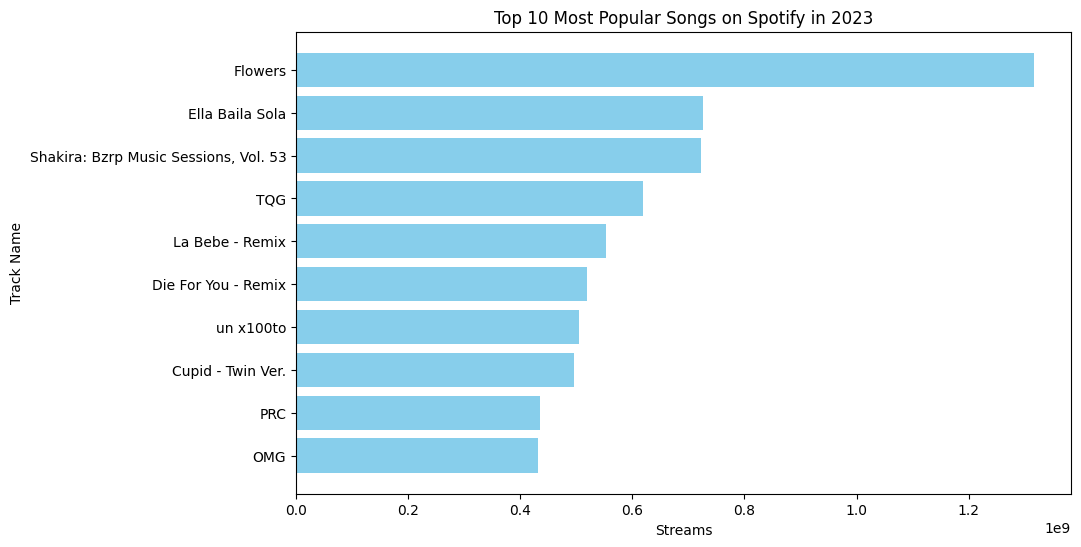

In [69]:
top_10_spotify = data[data['released_year'] == 2023].nlargest(10, 'streams')
plt.figure(figsize=(10, 6))
plt.barh(top_10_spotify['track_name'], top_10_spotify['streams'], color='skyblue')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.title('Top 10 Most Popular Songs on Spotify in 2023')
plt.gca().invert_yaxis()
plt.show()

Побудова кругової діаграми для тих самих даних

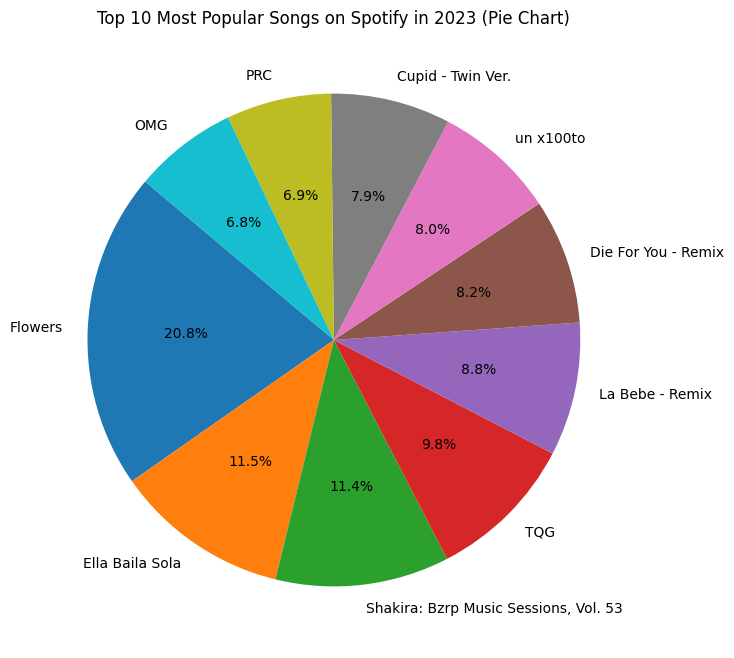

In [70]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_spotify['streams'], labels=top_10_spotify['track_name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Popular Songs on Spotify in 2023 (Pie Chart)')
plt.show()

Завдання 2: Побудова кругової діаграми для розподілу за danceability серед найпопулярніших пісень у 2023 році

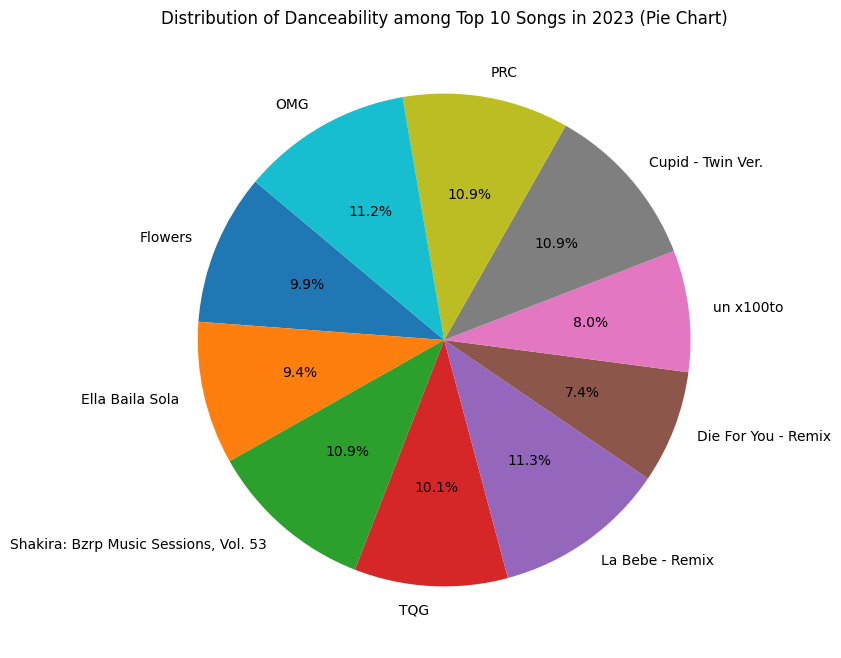

In [71]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_spotify['danceability_%'], labels=top_10_spotify['track_name'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Danceability among Top 10 Songs in 2023 (Pie Chart)')
plt.show()

Завдання 3: Побудова лінійного графіка, що відображає зміни кількості прослуховувань певного треку протягом року 2023

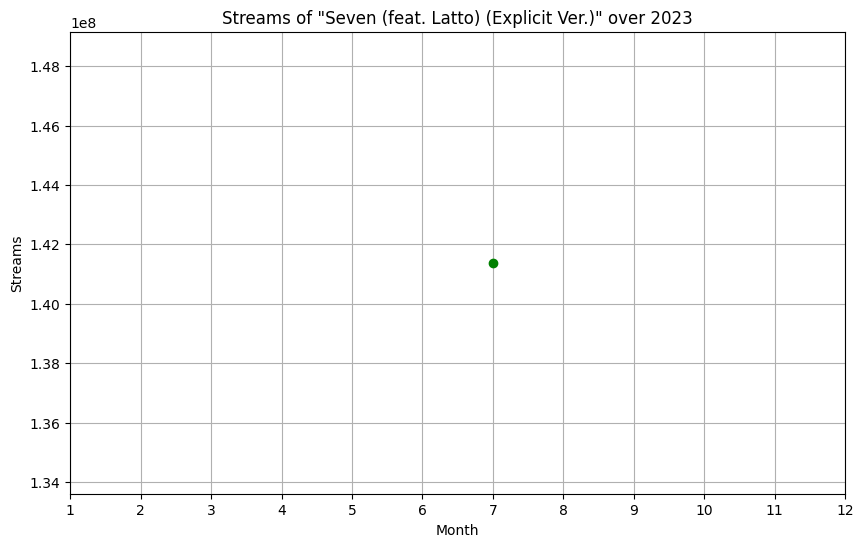

In [72]:
specific_track = data[data['track_name'] == 'Seven (feat. Latto) (Explicit Ver.)']
plt.figure(figsize=(10, 6))
plt.plot(specific_track['released_month'], specific_track['streams'], marker='o', color='green', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Streams')
plt.title('Streams of "Seven (feat. Latto) (Explicit Ver.)" over 2023')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Завдання 4: Створення стовпчикової діаграми, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів

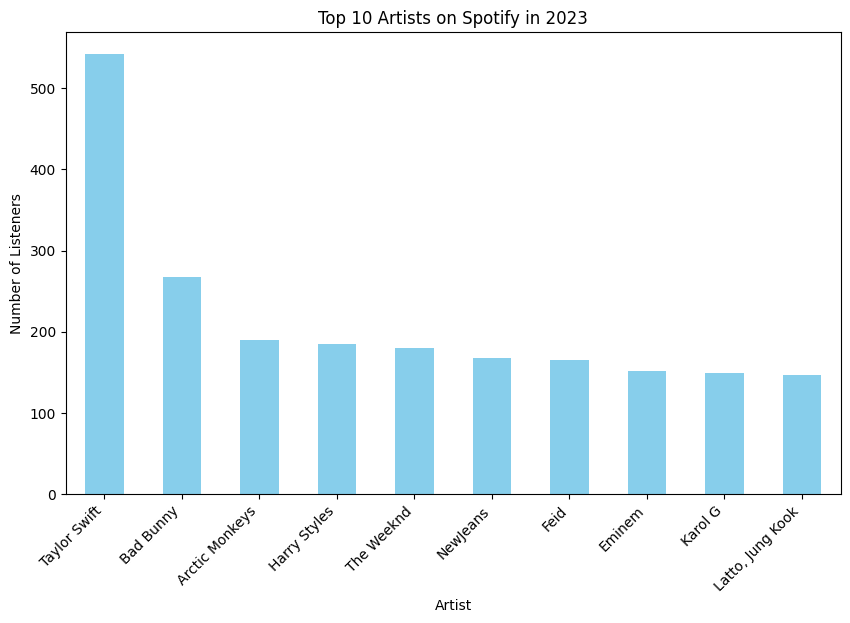

In [73]:
top_artists = data.groupby('artist(s)_name')['in_spotify_charts'].sum().nlargest(10)

# Побудова стовпчикової діаграми
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Number of Listeners')
plt.title('Top 10 Artists on Spotify in 2023')
plt.xticks(rotation=45, ha='right')
plt.show()

Завдання 5: Побудова стовпчикової діаграми, що порівнює кількість прослуховувань трьох конкретних треків у 2023 році

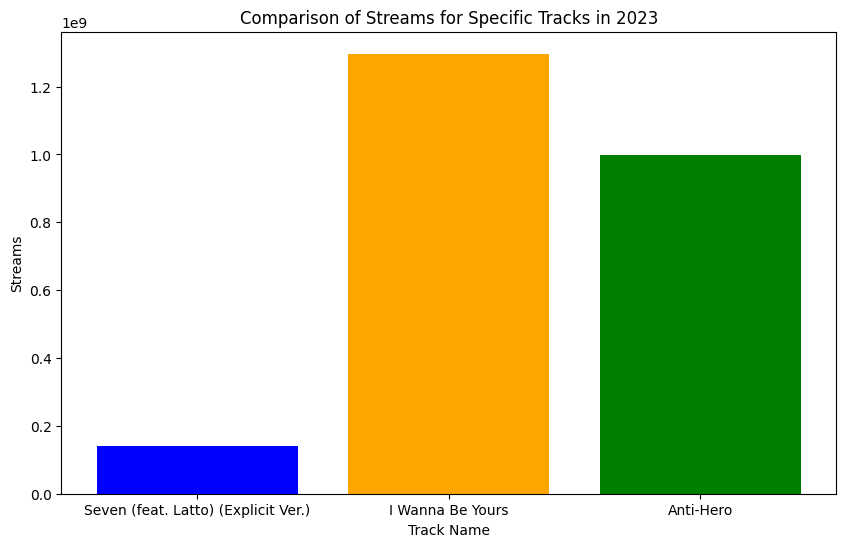

In [74]:
specific_tracks = data[data['track_name'].isin(['Seven (feat. Latto) (Explicit Ver.)', 'I Wanna Be Yours', 'Anti-Hero'])]
plt.figure(figsize=(10, 6))
plt.bar(specific_tracks['track_name'], specific_tracks['streams'], color=['blue', 'orange', 'green'])
plt.xlabel('Track Name')
plt.ylabel('Streams')
plt.title('Comparison of Streams for Specific Tracks in 2023')
plt.show()